First thing to implement is a mechanism to represent the beams and draw them according to their coordinates. For now let's just consider 2D cases.

In [1]:
#let's define an object with the coordinates of a beam
type beamXY
    x0::Float64 #begin xy
    y0::Float64
    
    xE::Float64 #end xy
    yE::Float64
end

Coordinates are inserted with the convention of going from bottom to top and from left to right.

In [2]:
const b = 10 #meters


#beams of this structure
AB = beamXY(0,0,2b,0)
BC = beamXY(2b,0,3b,0)

beamXY(20.0,0.0,30.0,0.0)

Beams are connected togheder via kinematic pairs, forming a **frame**. The connections are provided via **kinematic pairs**, which can provide some relative movements.

The frame type is just a collection of all the beams, counting also the degrees of freedom generated by them.
Kinematic pairs are then defined by the user, using the same convention for beams, defining the presence of reaction forces at the point.


In [5]:
type connection #the 1 or 0 establishes the presence of a connection or not.
    Fx::Int8
    Fy::Int8
    Mz::Int8
    
    doc::Int8
    
    function connection(Fx,Fy,Mz) #counts the degrees of constraint (doc) of the connection 
        doc = 0
        
        if (Fx != 0 && Fx != 1) || (Fy != 0 && Fy != 1) || (Mz != 0 && Mz != 1)
            error("Costraints must be defined as either 1 or 0.")
        end
        
        if Fx == 1
            doc = doc + 1
        end
        if Fy == 1
            doc = doc + 1
        end
        if Mz == 1
            doc = doc + 1
        end
        
        new(Fx,Fy,Mz,doc)
    end
end

In [6]:
A = connection(1,1,0) #Revoluting joint
B = connection(0,1,1) #Horizontal slider
C = connection(1,0,1) #Vert. slider

connection(1,0,1,2)

In [11]:
type frame
    beams::Array
    cons::Array
    staticity::Int8
    
    function frame(beamlist, conslist)
        
        if (2*length(beamlist) - 1) != length(conslist)
            error("Number of beams and number of connections don't match.")
        end
        
        dof = 3*length(beamlist)
        doc = 0

        for con in conslist
            doc = doc + con.doc
        end

        stat = dof - doc

        new(beamlist, conslist, stat)
    end
end

In [17]:
myFrame = frame([AB BC],[A B C])

frame(beamXY[beamXY(0.0,0.0,20.0,0.0) beamXY(20.0,0.0,30.0,0.0)],connection[connection(1,1,0,2) connection(0,1,1,2) connection(1,0,1,2)],0)

The object frame automatically calculates the staticity level of the structure (ipostatic, isostatic, iperstatic).

Let's now implement the function to draw the structure using the PyPlot library.

In [13]:
using PyPlot

In [76]:
function plotFrame(frame)
    
    figure()
    for (i,beam) in enumerate(frame.beams)
        
        f = x -> ((beam.yE - beam.y0)/(beam.xE - beam.x0)).*x + beam.y0
        xv = convert(Array,linspace(beam.x0, beam.xE, 10))
        
        plot(xv,f(xv),"-k")
        
        i
        if (frame.cons[i].Fx == 1 && frame.cons[i].Fy == 0 && frame.cons[i].Mz == 0) || (frame.cons[i].Fx == 0 && frame.cons[i].Fy == 1 && frame.cons[i].Mz == 0)
            plot(beam.x0, beam.y0, "^k") #roller
        elseif (frame.cons[i].Fx == 0 && frame.cons[i].Fy == 0 && frame.cons[i].Mz == 1)
            plot(beam.x0, beam.y0, "+k") #double slider
        elseif (frame.cons[i].Fx == 1 && frame.cons[i].Fy == 1 && frame.cons[i].Mz == 0)
            plot(beam.x0, beam.y0, "ok") #hinge
        elseif (frame.cons[i].Fx == 1 && frame.cons[i].Fy == 0 && frame.cons[i].Mz == 1)
            plot(beam.x0, beam.y0, "dk") #vert slider
        elseif (frame.cons[i].Fx == 0 && frame.cons[i].Fy == 1 && frame.cons[i].Mz == 1)
            plot(beam.x0, beam.y0, "sk") #hor slider
        else 
            plot(beam.x0, beam.y0, "xk") #fixed
        end
        
        j = i + 1    
            
        if (frame.cons[j].Fx == 1 && frame.cons[j].Fy == 0 && frame.cons[j].Mz == 0) || (frame.cons[j].Fx == 0 && frame.cons[j].Fy == 1 && frame.cons[j].Mz == 0)
            plot(beam.xE, beam.yE, "^k") #roller
        elseif (frame.cons[j].Fx == 0 && frame.cons[j].Fy == 0 && frame.cons[j].Mz == 1)
            plot(beam.xE, beam.yE, "+k") #double slider
        elseif (frame.cons[j].Fx == 1 && frame.cons[j].Fy == 1 && frame.cons[j].Mz == 0)
            plot(beam.xE, beam.yE, "ok") #hinge
        elseif (frame.cons[j].Fx == 1 && frame.cons[j].Fy == 0 && frame.cons[j].Mz == 1)
            plot(beam.xE, beam.yE, "dk") #vert slider
        elseif (frame.cons[j].Fx == 0 && frame.cons[j].Fy == 1 && frame.cons[j].Mz == 1)
            plot(beam.xE, beam.yE, "sk") #hor slider
        else 
            plot(beam.xE, beam.yE, "xk") #fixed
        end
    end
    
    e = length(frame.beams)
    
    xlim(((frame.beams[1].x0 - 1),(frame.beams[e].xE + 1)))
    ylim(((frame.beams[1].y0 - 1),(frame.beams[e].yE + 1)))
    
end

plotFrame (generic function with 1 method)

This way we managed to plot the structure. The symbols represent the connections between the frames:

+ Triangle: Roller
+ Plus: Double Slider
+ Circle: Hinge (Revoluting Joint)
+ Diamond: Vertical slider
+ Square: Horizontal Slider
+ Cross: Fixed connection

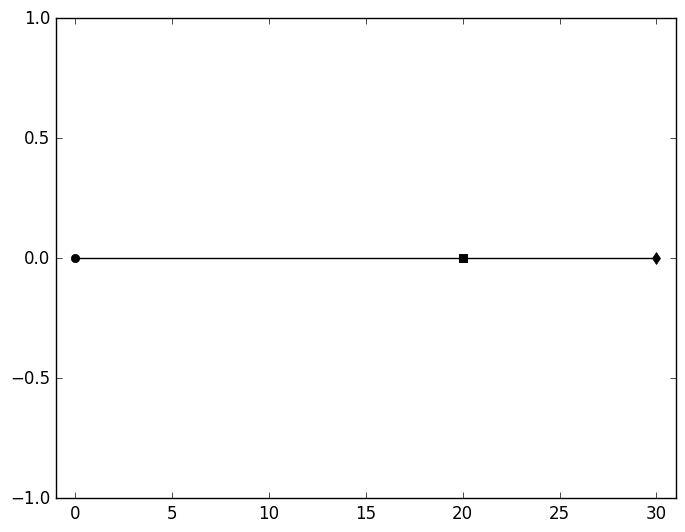

(-1.0,1.0)

In [77]:
plotFrame(myFrame)